# 강의실 배정
- https://www.acmicpc.net/problem/11000

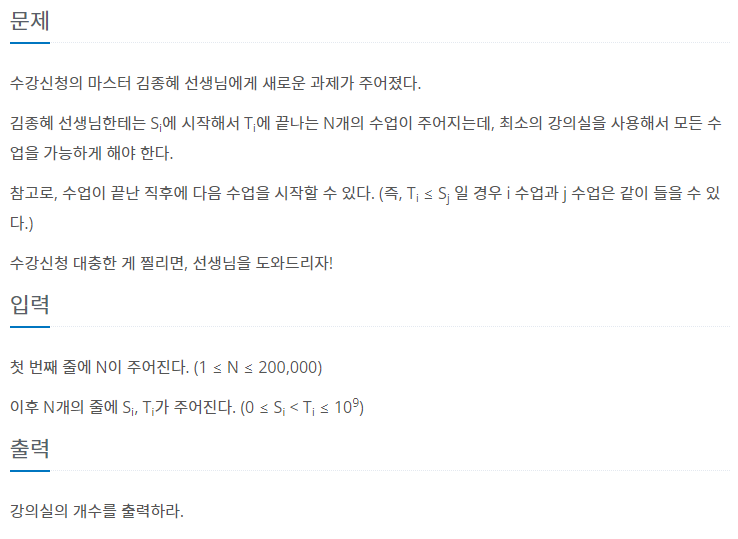

In [214]:
import heapq
n = int(input())

queue = []
for _ in range(n):
    s, t = map(int, input().split())
    queue.append([s, t])

queue = sorted(queue)

room = []
heapq.heappush(room, queue[0][1])

for i in range(1, n):
    if queue[i][0] < room[0]: # 현재 회의실 끝나는 시간보다 다음 회의 시작시간이 빠르면
        heapq.heappush(room, queue[i][1]) # 새로운 회의실 개설
    else: # 현재 회의실에 이어서 회의 개최 가능
        heapq.heappop(room) # 새로운 회의로 시간 변경을 위해 pop후 새 시간 push
        heapq.heappush(room, queue[i][1])

print(len(room))

3
1 3
2 4
3 5


# 통나무 건너뛰기
- https://www.acmicpc.net/problem/11497

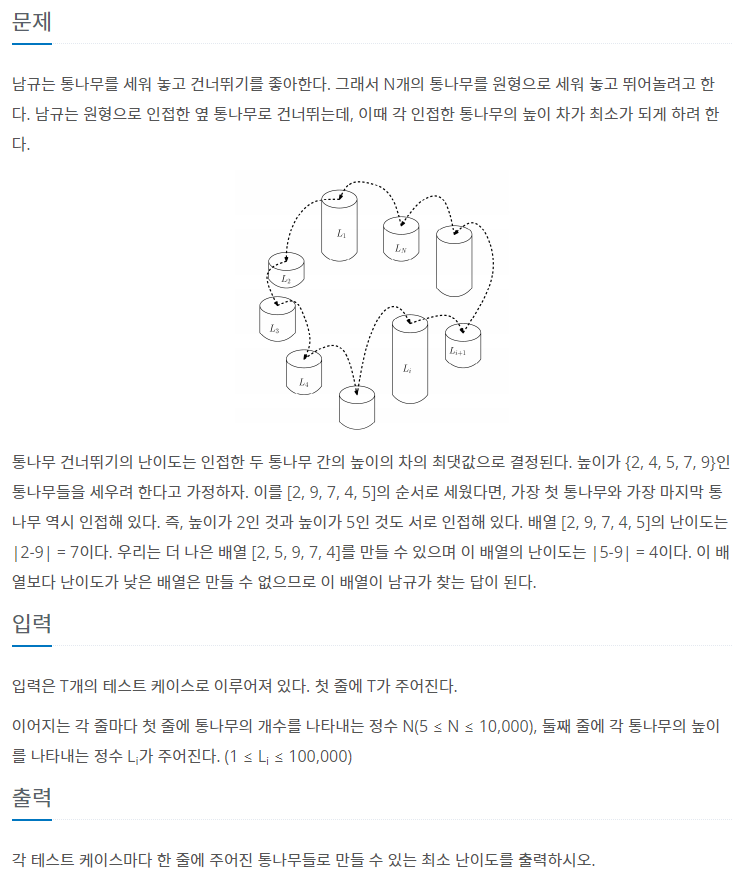

- 각 인접한 통나무의 높이 차가 최소가 되야함
- 난이도: 인접한 두 통나무 간의 높이의 차의 최댓값

<b> 풀이 </b>
1. 가장 큰 통나무를 가운데로 두고 양옆을 그 다음으로 큰 통나무로 채운다.
2. 왼쪽에는 다음으로 큰 두 수 중 작은 수로 채운다.
3. 오른쪽에는 다음으로 큰 두 수 중 큰 수로 채운다.

In [167]:
def find_difficulty(n, array):
    # 새로운 배열
    loc = [0] * n

    # 가운데 가장 큰 수를 위치
    mid = len(array) // 2

    # 가장 큰 수
    max_num = array.pop()
    loc[mid] = max_num

    # 모든 원소를 비울 때까지 반복
    idx = 1
    while array:
        if len(array) == 1:
            remain = array.pop()
            loc[mid-idx] = remain
        else:    
            right = array.pop()
            left = array.pop()

            # 양옆에 위치
            loc[mid+idx] = right
            loc[mid-idx] = left
        idx += 1

    ans = 0
    for i in range(len(loc)):
        if i == len(loc) - 1:
            ans = max(ans, abs(loc[i] - loc[0]))
        else:
            ans = max(ans, abs(loc[i]-loc[i+1]))

    print(ans)

# 테스트 케이스 개수
t = int(input())
for _ in range(t):    
    # 통나무의 개수
    n = int(input())
    array = sorted(list(map(int, input().split())))
    find_difficulty(n, array)

3
7
13 10 12 11 10 11 12
1
5
2 4 5 7 9
4
8
6 6 6 6 6 6 6 6
0


# 내일 할거야
- https://www.acmicpc.net/problem/7983

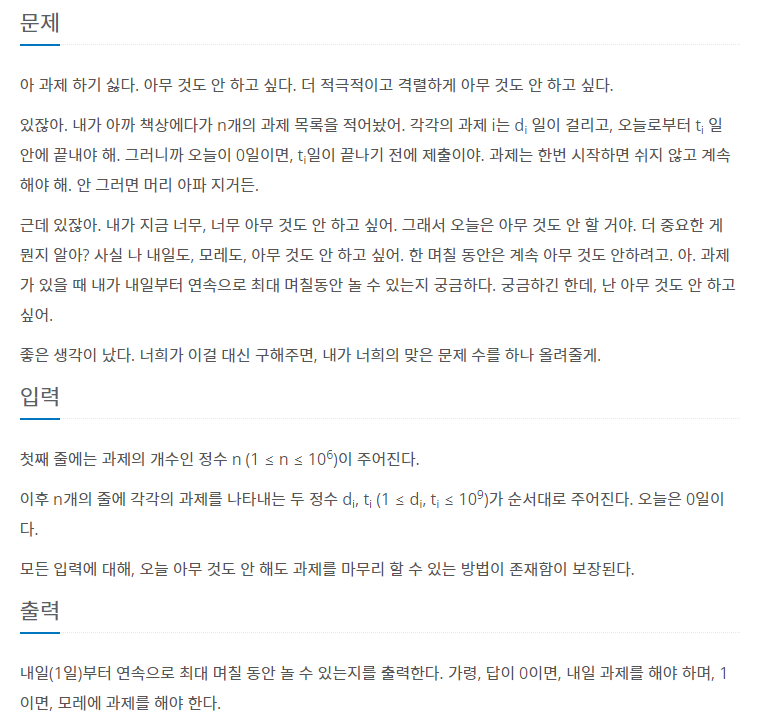

In [186]:
# 오답(시간초과)
# 과제의 개수
n = int(input())

array = []
for _ in range(n):
    d, t = map(int, input().split())
    array.append((d, t))

array = sorted(array, key=lambda x:-x[1])

new = []
for d, t in array:
    for i in range(d):
        if t-i not in new:
            new.append(t-i)
        else:
            new.append(t-1-i)

print(new[-1]-1)

3
2 8
1 13
3 10
5


---

In [202]:
# 다시 푼 코드
# 과제의 개수
n = int(input())

array = []
for _ in range(n):
    d, t = map(int, input().split())
    array.append((d, t))


array = sorted(array, key=lambda x:-x[1])

# 최대 놀 수 있는 시간 초기화
spare_day = array[0][1]

for i in range(n):
    # 최대 놀 수 있는 시간 = 과제를 마무리 해야하는 날 - 걸리는 시간
    spare_day = min(array[i][1], spare_day) - array[i][0]
print(spare_day)

3
2 8
1 13
3 10
5
